In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# importing dataset
file_path = 'Unemployment_Rate_upto_11_2020.csv'

In [7]:
# Read the CSV file into a pandas DataFrame
unemployment_data = pd.read_csv(file_path)

In [8]:
# Display basic information about the DataFrame
print("Data Overview:")
print(unemployment_data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [9]:

# Display the first few rows of the DataFrame to understand the data structure
print("\nFirst 20 rows of the data:")
print(unemployment_data.head(20))


First 20 rows of the data:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0   Andhra Pradesh   31-01-2020          M                              5.48   
1   Andhra Pradesh   29-02-2020          M                              5.83   
2   Andhra Pradesh   31-03-2020          M                              5.79   
3   Andhra Pradesh   30-04-2020          M                             20.51   
4   Andhra Pradesh   31-05-2020          M                             17.43   
5   Andhra Pradesh   30-06-2020          M                              3.31   
6   Andhra Pradesh   31-07-2020          M                              8.34   
7   Andhra Pradesh   31-08-2020          M                              6.96   
8   Andhra Pradesh   30-09-2020          M                              6.40   
9   Andhra Pradesh   31-10-2020          M                              6.59   
10           Assam   31-01-2020          M                              4.66   
11          

In [10]:
# Printing column names
print("Column Names:")
print(unemployment_data.columns)

Column Names:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [11]:
# Removing leading and trailing spaces from column names
unemployment_data.columns = unemployment_data.columns.str.strip()


In [12]:
# 1. Average Unemployment Rate
average_unemployment_rate = unemployment_data['Estimated Unemployment Rate (%)'].mean()
print(f"\nAverage Unemployment Rate: {average_unemployment_rate:.2f}%")



Average Unemployment Rate: 12.24%


In [15]:
# 2. Maximum Unemployment Rate
max_unemployment_row = unemployment_data.loc[unemployment_data['Estimated Unemployment Rate (%)'].idxmax()]
print(f"\nMaximum Unemployment Rate:")
print(max_unemployment_row)



Maximum Unemployment Rate:
Region                                      Puducherry
Date                                        30-04-2020
Frequency                                            M
Estimated Unemployment Rate (%)                  75.85
Estimated Employed                              117542
Estimated Labour Participation Rate (%)           39.3
Region.1                                         South
longitude                                      11.9416
latitude                                       79.8083
Name: 172, dtype: object


In [16]:
# 3. Region-wise Analysis
region_wise_average = unemployment_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print("\nRegion-wise Average Unemployment Rate:")
print(region_wise_average)


Region-wise Average Unemployment Rate:
Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: Estimated Unemployment Rate (%), dtype: float64


In [17]:
# 4. Temporal Analysis
temporal_analysis = unemployment_data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
print("\nTemporal Analysis - Average Unemployment Rate over Time:")
print(temporal_analysis)


Temporal Analysis - Average Unemployment Rate over Time:
Date
 29-02-2020     9.266154
 30-04-2020    22.236154
 30-06-2020    10.911111
 30-09-2020     8.705926
 31-01-2020     9.196538
 31-03-2020    10.782593
 31-05-2020    23.244444
 31-07-2020     9.834444
 31-08-2020    10.313333
 31-10-2020     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64


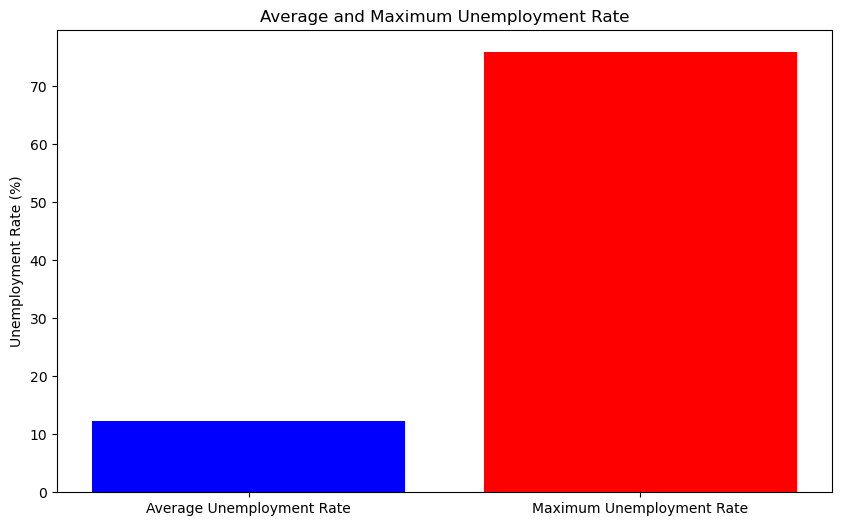

In [18]:
# Visualizations
# 1. Average and Maximum Unemployment Rate - Single Bar
plt.figure(num='Average_Max_Unemployment_Rate', figsize=(10, 6))
plt.bar(['Average Unemployment Rate', 'Maximum Unemployment Rate'], [average_unemployment_rate, max_unemployment_row['Estimated Unemployment Rate (%)']], color=['blue', 'red'])
plt.title('Average and Maximum Unemployment Rate')
plt.ylabel('Unemployment Rate (%)')
plt.show()

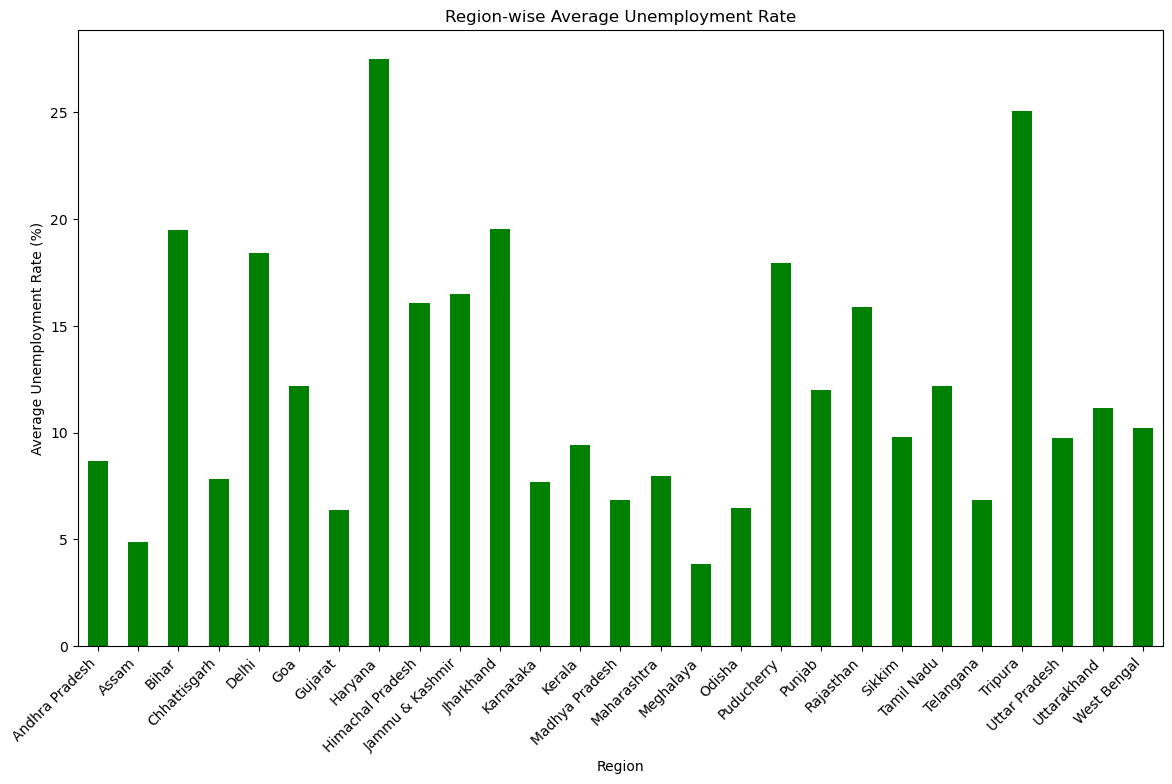

In [19]:
# 2. Region-wise Analysis - Bar Chart
plt.figure(num='Region_wise_Avg_Unemployment_Rate', figsize=(14, 8))
region_wise_average.plot(kind='bar', color='green')
plt.title('Region-wise Average Unemployment Rate')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

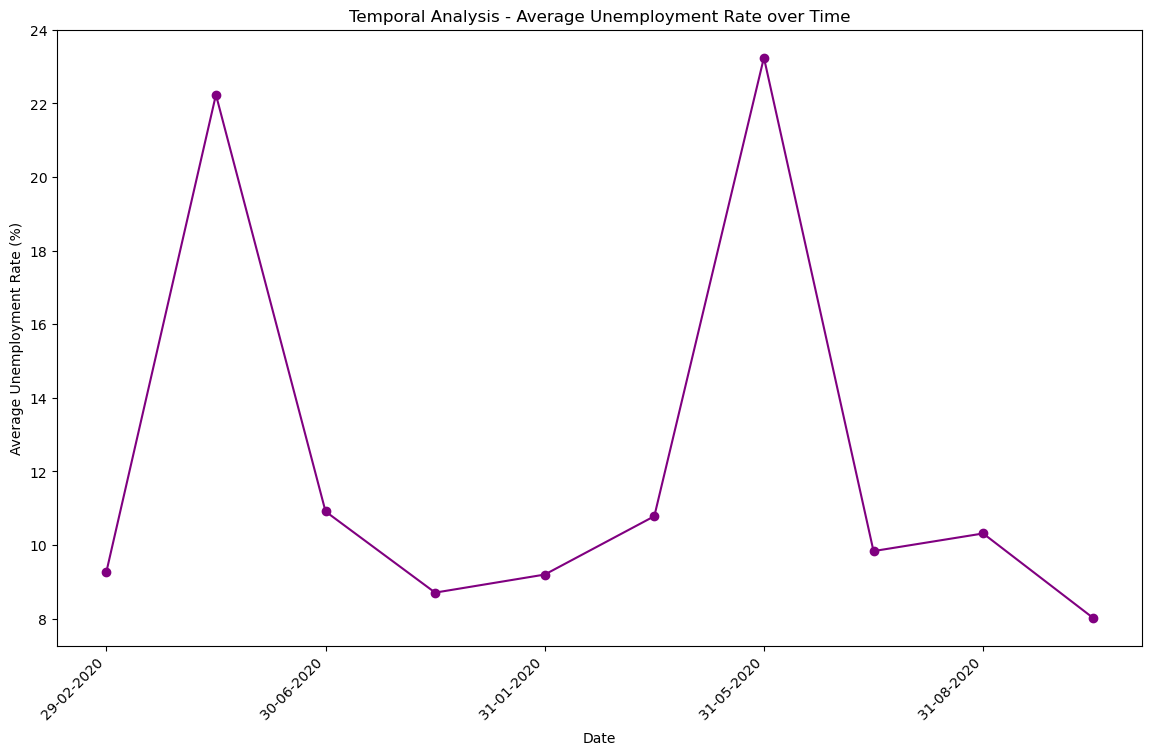

In [20]:
# 3. Temporal Analysis - Line Chart
plt.figure(num='Temporal_Analysis_Avg_Unemployment_Rate', figsize=(14, 8))
temporal_analysis.plot(kind='line', marker='o', color='purple')
plt.title('Temporal Analysis - Average Unemployment Rate over Time')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

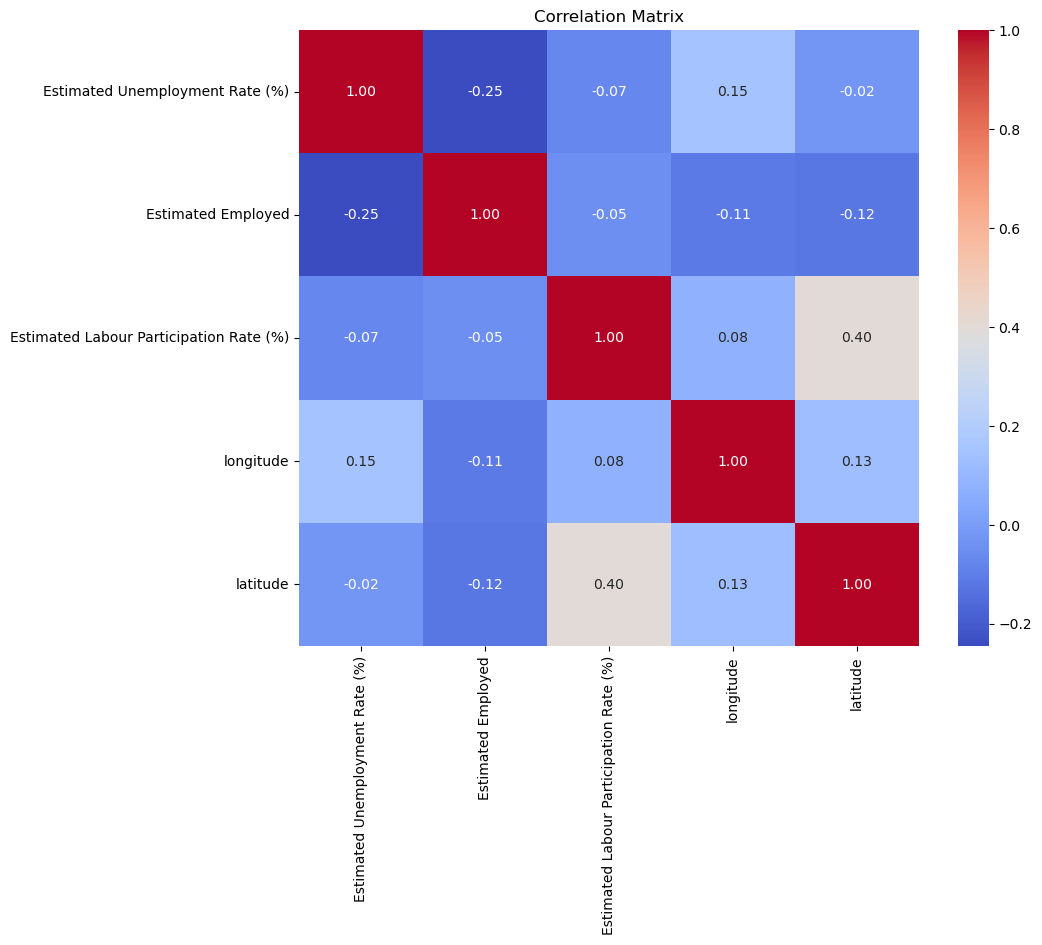

In [22]:
# 5. Correlation Analysis
numeric_columns = unemployment_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = unemployment_data[numeric_columns].corr()


# Visualize the correlation matrix
plt.figure(num='Correlation_Matrix', figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

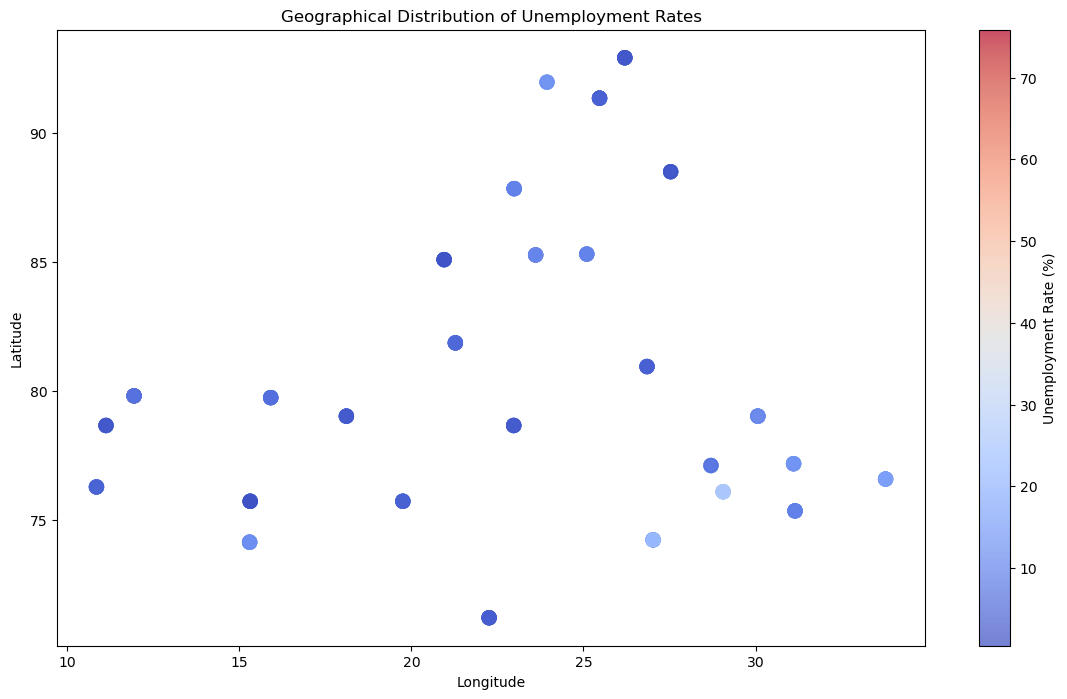

In [23]:
# 6. Geographical Distribution
plt.figure(num='Geographical_Distribution', figsize=(14, 8))
plt.scatter(unemployment_data['longitude'], unemployment_data['latitude'], c=unemployment_data['Estimated Unemployment Rate (%)'], cmap='coolwarm', s=100, alpha=0.7)
plt.title('Geographical Distribution of Unemployment Rates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Unemployment Rate (%)')
plt.show()


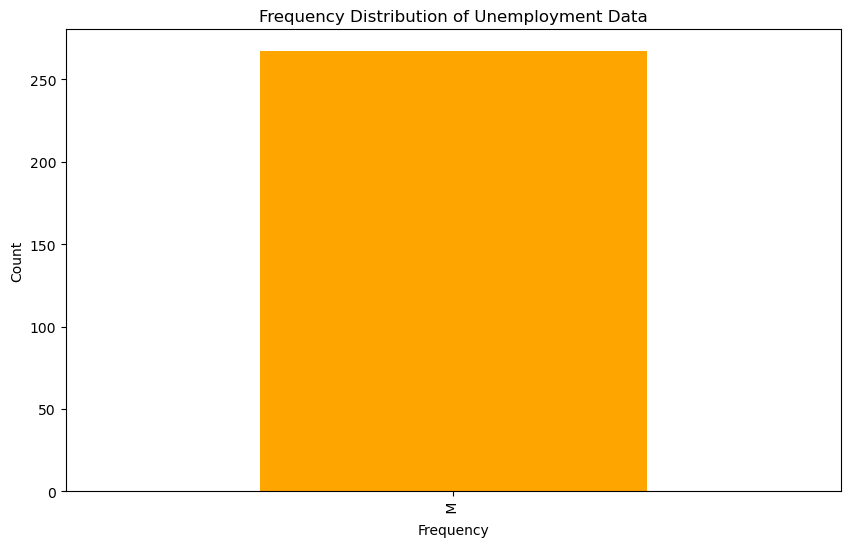

In [24]:
# 7. Frequency Analysis
plt.figure(num='Frequency_Distribution', figsize=(10, 6))
unemployment_data['Frequency'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Frequency Distribution of Unemployment Data')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

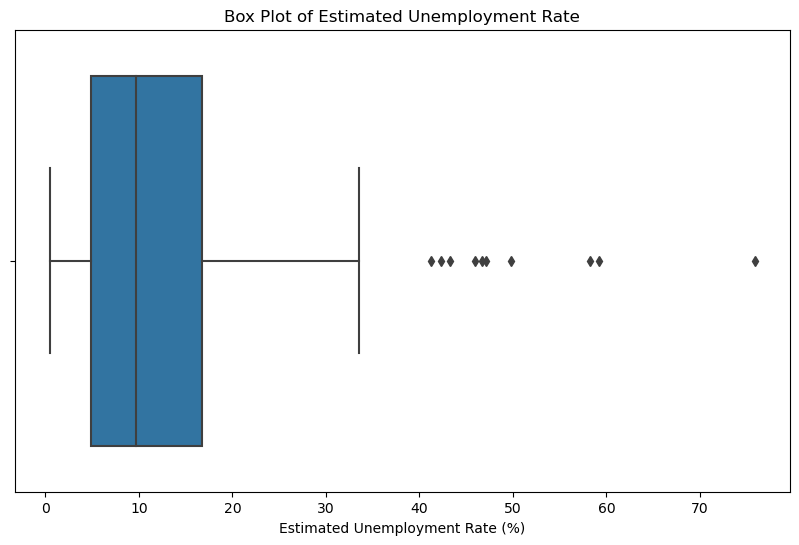

In [25]:
# 8. Outlier Detection - Box Plot
plt.figure(num='Outlier_Detection_Box_Plot', figsize=(10, 6))
sns.boxplot(x=unemployment_data['Estimated Unemployment Rate (%)'])
plt.title('Box Plot of Estimated Unemployment Rate')
plt.show()


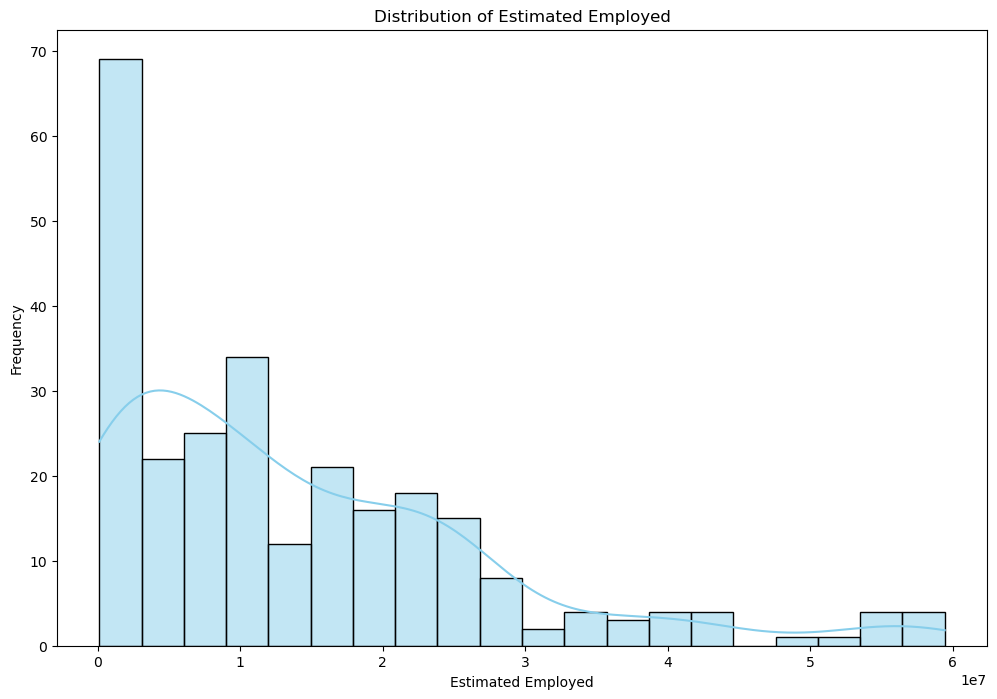

In [26]:
# 9. Distribution of Employed
plt.figure(num='Distribution_of_Employed', figsize=(12, 8))
sns.histplot(unemployment_data['Estimated Employed'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

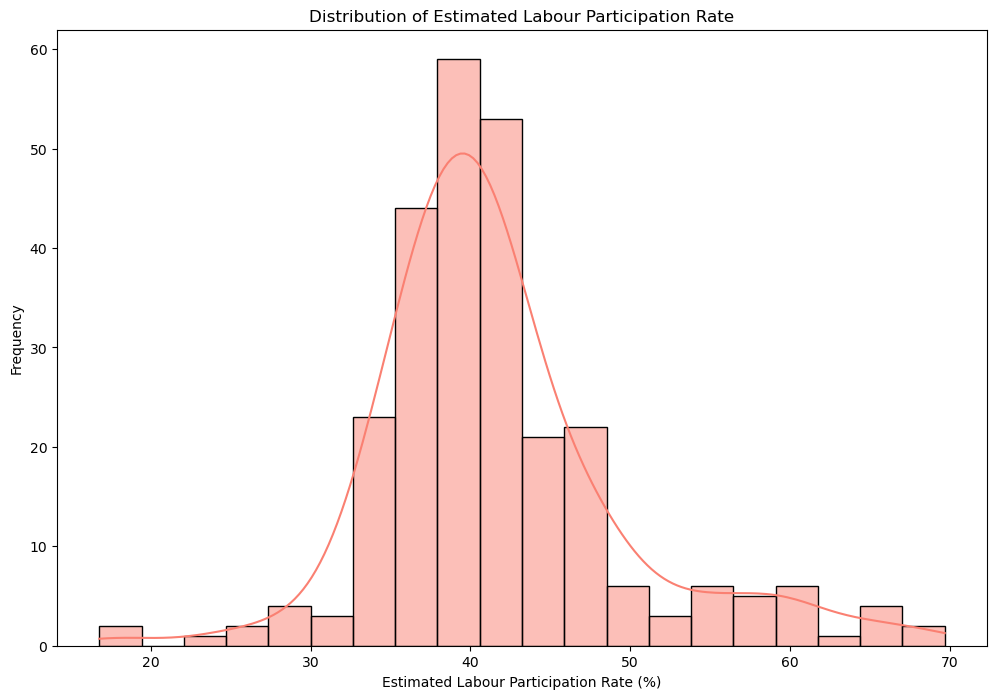

In [27]:
# 10. Distribution of Labor Participation Rate
plt.figure(num='Distribution_of_Labor_Participation_Rate', figsize=(12, 8))
sns.histplot(unemployment_data['Estimated Labour Participation Rate (%)'], kde=True, color='salmon', bins=20)
plt.title('Distribution of Estimated Labour Participation Rate')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()
